In [221]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from timeStampsConversions import ordinal_to_timestamp

%matplotlib inline

In [222]:
df = pd.read_csv('src/saveString.csv', usecols=lambda column: column != 'row_Index')
#Checking for missing values
df.isnull().sum()


date_time              0
dp_PGCT                0
dp_WESP                0
dp_droplet             0
dp_quench              0
dp_GC                  0
power_input            0
roaster1inOperation    0
roaster2inOperation    0
dtype: int64

In [223]:
df.head()

,date_time,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
0,44206.0,10.509336,6.272787,0.545882,3.395085,21.087129,75.384777,1.000000,0.0
1,44206.5,14.642492,12.643013,1.255044,6.408090,35.434000,28.113416,1.000000,0.0
2,44207.0,14.703767,12.133283,1.280569,6.402909,34.943308,28.924979,1.000000,0.0
3,44207.5,10.097474,7.080278,0.645413,3.408086,21.647224,72.995235,1.000000,0.0
4,44208.0,6.018603,5.033742,0.055585,0.843228,12.256846,92.785210,0.627778,0.0


In [224]:
df['date_time'] = df['date_time'].apply(ordinal_to_timestamp)
df.head()

,date_time,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
0,2021-01-11 00:00:00,10.509336,6.272787,0.545882,3.395085,21.087129,75.384777,1.000000,0.0
1,2021-01-11 12:00:00,14.642492,12.643013,1.255044,6.408090,35.434000,28.113416,1.000000,0.0
2,2021-01-12 00:00:00,14.703767,12.133283,1.280569,6.402909,34.943308,28.924979,1.000000,0.0
3,2021-01-12 12:00:00,10.097474,7.080278,0.645413,3.408086,21.647224,72.995235,1.000000,0.0
4,2021-01-13 00:00:00,6.018603,5.033742,0.055585,0.843228,12.256846,92.785210,0.627778,0.0


In [225]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,date_time,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
0,2021-01-11 00:00:00,10.509336,6.272787,0.545882,3.395085,21.087129,75.384777,1.000000,0.0
1,2021-01-11 12:00:00,14.642492,12.643013,1.255044,6.408090,35.434000,28.113416,1.000000,0.0
2,2021-01-12 00:00:00,14.703767,12.133283,1.280569,6.402909,34.943308,28.924979,1.000000,0.0
3,2021-01-12 12:00:00,10.097474,7.080278,0.645413,3.408086,21.647224,72.995235,1.000000,0.0
4,2021-01-13 00:00:00,6.018603,5.033742,0.055585,0.843228,12.256846,92.785210,0.627778,0.0


In [226]:
df.set_index('date_time', inplace=True)
df.head()

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
date_time,,,,,,,,
2021-01-11 00:00:00,10.509336,6.272787,0.545882,3.395085,21.087129,75.384777,1.000000,0.0
2021-01-11 12:00:00,14.642492,12.643013,1.255044,6.408090,35.434000,28.113416,1.000000,0.0
2021-01-12 00:00:00,14.703767,12.133283,1.280569,6.402909,34.943308,28.924979,1.000000,0.0
2021-01-12 12:00:00,10.097474,7.080278,0.645413,3.408086,21.647224,72.995235,1.000000,0.0
2021-01-13 00:00:00,6.018603,5.033742,0.055585,0.843228,12.256846,92.785210,0.627778,0.0


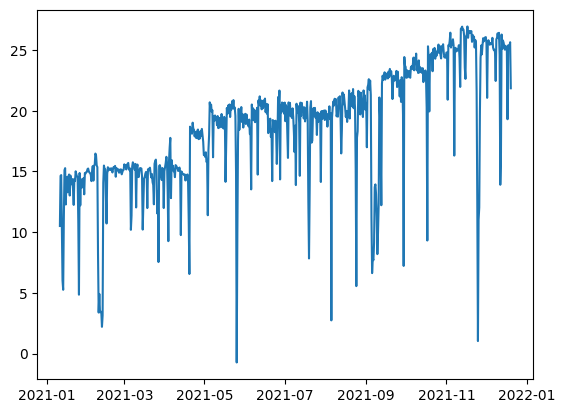

In [227]:
plt.plot(df['dp_PGCT'])
plt.show()

In [228]:
#Check Stationarity of the data
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print('Augmented Dickey-Fuller Test:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1] <= 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

In [229]:
adf_test(df['dp_PGCT'])

Augmented Dickey-Fuller Test:-3.214612056540368
p-value:0.019154303578304843
Stationary


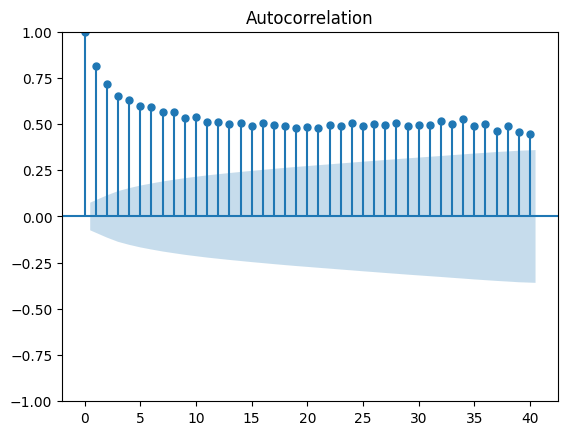

In [230]:
#Checking AR and MA Values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf = plot_acf(df['dp_PGCT'], lags=40)

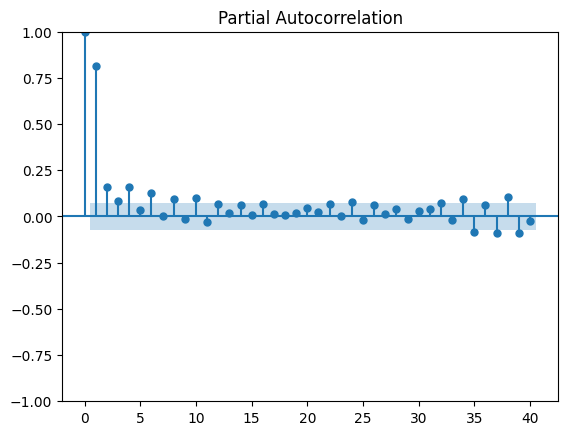

In [231]:
pacf= plot_pacf(df['dp_PGCT'], lags=40)

In [232]:
df

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
date_time,,,,,,,,
2021-01-11 00:00:00,10.509336,6.272787,0.545882,3.395085,21.087129,75.384777,1.000000,0.000000
2021-01-11 12:00:00,14.642492,12.643013,1.255044,6.408090,35.434000,28.113416,1.000000,0.000000
2021-01-12 00:00:00,14.703767,12.133283,1.280569,6.402909,34.943308,28.924979,1.000000,0.000000
2021-01-12 12:00:00,10.097474,7.080278,0.645413,3.408086,21.647224,72.995235,1.000000,0.000000
2021-01-13 00:00:00,6.018603,5.033742,0.055585,0.843228,12.256846,92.785210,0.627778,0.000000
...,...,...,...,...,...,...,...,...
2021-12-18 00:00:00,25.395878,27.632454,3.072559,14.845974,71.339273,14.936547,0.994444,1.000000
2021-12-18 12:00:00,25.251676,27.627309,3.061036,14.663161,70.996741,15.116402,1.000000,0.993056
2021-12-19 00:00:00,25.335632,26.998432,3.038211,14.454034,70.190584,14.692402,0.938889,1.000000


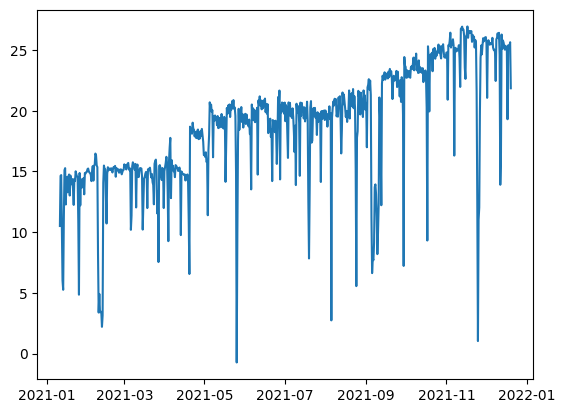

In [233]:
plt.plot(df['dp_PGCT'])

In [234]:
#Splitting the data into training and testing data
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,9,30)
test_dataset_end=datetime(2021,10,15)

In [235]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end:test_dataset_end]

In [236]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-09-30 00:00:00
2021-10-15 00:00:00


In [237]:
test_data

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
date_time,,,,,,,,
2021-09-30 00:00:00,24.428202,27.472158,3.928176,14.351288,70.616806,14.138775,1.000000,1.000000
2021-09-30 12:00:00,23.725044,28.771902,4.002927,14.113823,71.020312,14.413945,1.000000,1.000000
2021-10-01 00:00:00,23.615196,27.611034,3.947008,14.024271,69.605674,13.914224,1.000000,1.000000
2021-10-01 12:00:00,22.719878,29.278398,4.111308,14.189829,70.609163,14.351197,0.866667,1.000000
2021-10-02 00:00:00,23.343743,28.021853,3.987144,13.899009,69.665698,15.558844,0.990278,0.998611
2021-10-02 12:00:00,22.754911,29.282673,4.022797,13.841518,70.281159,16.402201,1.000000,1.000000
2021-10-03 00:00:00,23.250815,27.620903,3.912499,13.562427,68.823075,15.485104,1.000000,1.000000
2021-10-03 12:00:00,23.280067,28.788996,3.914719,13.550959,69.978793,15.316596,0.944444,1.000000
2021-10-04 00:00:00,22.846061,26.498956,3.800773,13.181434,66.745826,15.097289,0.988889,1.000000


In [238]:
#Building the ARIMA Model
from statsmodels.tsa.arima.model import  ARIMA
model=ARIMA(train_data['dp_PGCT'],order=(5,0,5))

c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)


In [239]:
model_fitted = model.fit()

c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [240]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                dp_PGCT   No. Observations:                  525
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1224.886
Date:                Mon, 13 Jan 2025   AIC                           2473.772
Time:                        14:05:43   BIC                           2524.932
Sample:                    01-11-2021   HQIC                          2493.805
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0181      3.023      5.629      0.000      11.093      22.943
ar.L1          0.0717      0.107      0.668      0.504      -0.139       0.282
ar.L2          0.3409      0.098      3.490      0.000       0.149       0.532
ar.L3          0.4924      0.115      4.292      0.000       0.268       0.717
ar.L4          0.6565      0.098      6.722      0.000       0.465       0.848
ar.L5         -0.5662      0.068     -8.313      0.000      -0.700      -0.433
ma.L1          0.5782      0.118      4.917      0.000       0.348       0.809
ma.L2          0.0173      0.136      0.128      0.898      -0.249       0.283
ma.L3         -0.4751      0.103     -4.633      0.000      -0.676      -0.274
ma.L4         -0.9175      0.128     -7.142      0.000      -1.169      -0.666
ma.L5         -0.0319      0.073     -0.435      0.664      -0.176       0.112
sigma2         6.1388      0.234     26.273      0.000       5.681       6.597
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2601.14
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [241]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-09-30 00:00:00
2021-10-15 00:00:00


In [242]:
pred = model_fitted.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['dp_PGCT'] - pred

<Axes: ylabel='Density'>

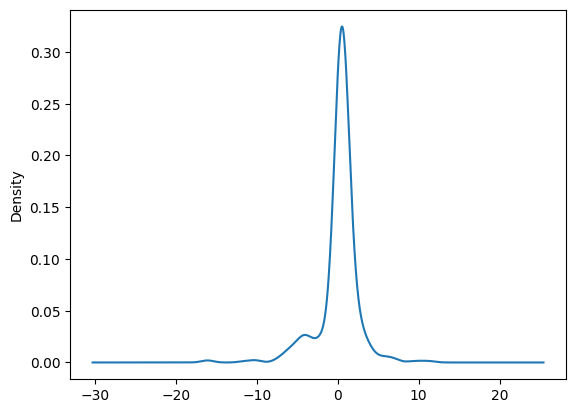

In [243]:
model_fitted.resid.plot(kind='kde')

In [244]:
test_data['dp_PGCT_predicted'] = pred

C:\Users\athhatek\AppData\Local\Temp\ipykernel_15904\3764480766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['dp_PGCT_predicted'] = pred


<Axes: xlabel='date_time'>

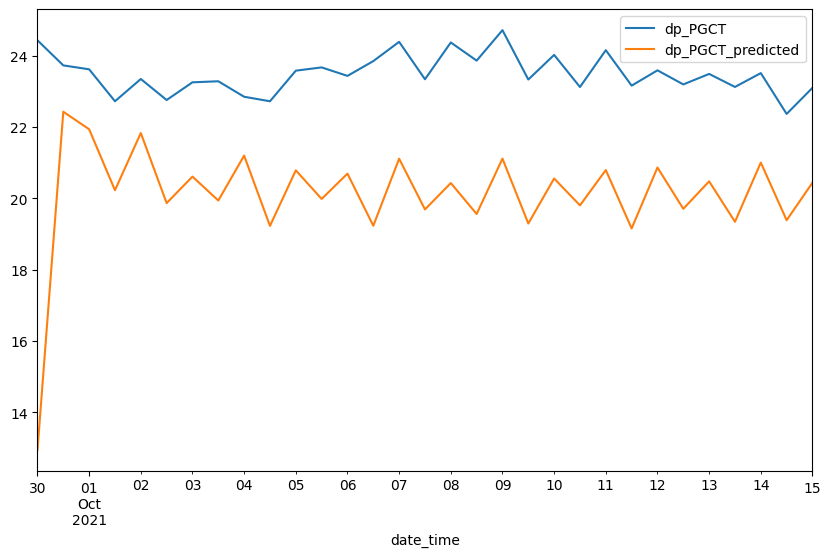

In [245]:
test_data[['dp_PGCT','dp_PGCT_predicted']].plot(figsize=(10,6))

In [246]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [247]:
model_SARIMAX = SARIMAX(train_data['dp_PGCT'],order=(5,0,5),seasonal_order=(5,0,5,6))

c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)


In [248]:
model_SARIMAX_fitted = model_SARIMAX.fit()

c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\athhatek\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [249]:
# model_SARIMAX_fitted.summary()

In [250]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-09-30 00:00:00
2021-10-15 00:00:00


<Axes: ylabel='Density'>

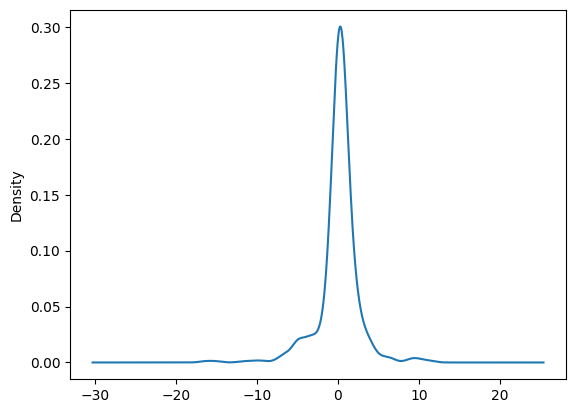

In [251]:
pred_Sarima=model_SARIMAX_fitted.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['dp_PGCT']- pred_Sarima
model_SARIMAX_fitted.resid.plot(kind='kde')

In [252]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\athhatek\AppData\Local\Temp\ipykernel_15904\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='date_time'>

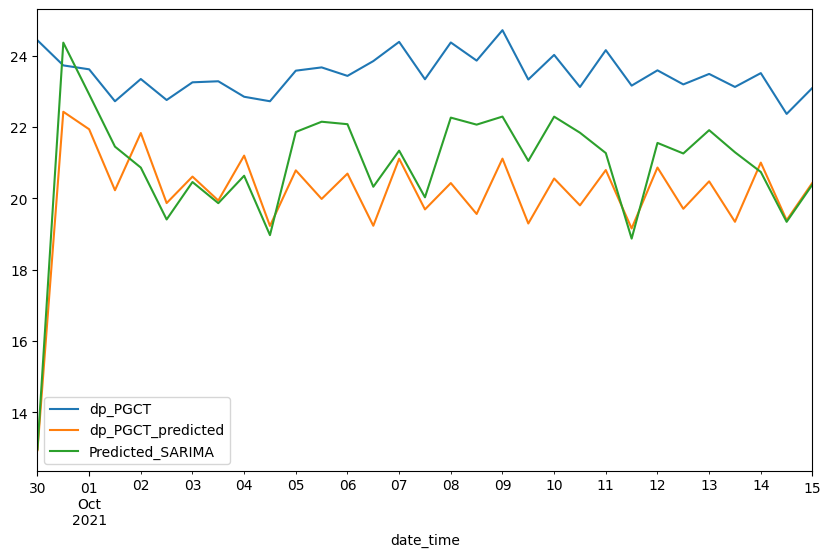

In [253]:
test_data[['dp_PGCT','dp_PGCT_predicted','Predicted_SARIMA']].plot(figsize=(10,6))